Team: (30)
Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.
Start your data from the first day of infections in US. X-Axis - number of days since the first case, Y-Axis - number of new cases and deaths.
Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). Discuss bias versus variance tradeoff.
Plot trend line along for the data along with the forecast of 1 week ahead.
Describe the trends as compared to other countries.

In [1]:
### Import the libraries needed
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
X = np.random.rand(1000,1)
y = 5*((X)**(2)) + np.random.rand(1000,1)

### defining the loss function

In [4]:
def loss(y, y_hat):
    
    # y --> true/target value.
    # y_hat --> hypothesis
    
    #Calculating loss.
    loss = np.mean((y_hat - y)**2)
    return loss

### Function to calculate the gradients 

In [5]:
# Calulating gradient of loss w.r.t parameters(weights and bias).
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

### Function to add features to input data

In [6]:
def x_transform(X, degrees):
    
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # making a copy of X.
    t = X.copy()
    
    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t**i, axis=1)
            
    return X

### Training Function 

In [7]:
def train(X, y, bs, degrees, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.
    
    # Adding features to input X.
    x = x_transform(X, degrees)
    
    # m-> number of training examples
    # n-> number of features 
    m, n = x.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

### Prediction Function 

In [9]:
# Predicting function.
def predict(X, w, b, degrees):
    
    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # Adding degrees to input X.
    x1 = x_transform(X, degrees)
    
    # Returning predictions.
    return np.dot(x1, w) + b

### Training and plotting prediction 

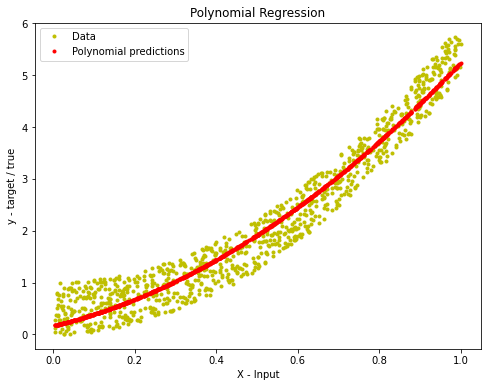

In [10]:
w, b, l = train(X, y, bs=100, degrees=[2], epochs=1000,
                lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

### Getting the R2 score

In [11]:
def r2_score(y, y_hat):
    return 1 - (np.sum((np.array(y_hat)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))
r2_score(y_train, predict(x_train, w, b, [2]))

NameError: name 'y_train' is not defined